Cálculos utilizado no desenvolvimento do projeto de formatura do departamento de Engenharia de Sistemas Eletrônicos pela Escola Politécnica da Universidade de São Paulo

Autor: Marcus Vinicius Gonçalves Mendes
N° USP: 9349516
Orientadores: Marcelo Knörich Zuffo e Roseli de Deus Lopes
Orientador externo: Alberto Ferreira de Sousa

In [1]:
import math

In [2]:
from matplotlib import pyplot as plt

In [64]:
# Constants
# Values: 0, 2.5, 6, 11
adc_attenuation = 11
vcc = 5

r_values = [27e3, 33e3, 47e3, 68e3, 82e3, 100e3, 150e3, 220e3, 330e3,470e3, 560e3, 680e3, 1e6, 5.6e6]

In [82]:
# ESP32 data

# ESP32 ADC measurable input voltage ranges, classified by attenuation levels, in Volts
# Source: https://docs.espressif.com/projects/esp-idf/en/latest/esp32/api-reference/peripherals/adc.html

esp32_adc = {  0: {"v_min": 0.10, "v_max": 0.95, "average": (0.10 + 0.95) / 2, "excursion": (0.95 - 0.10)},
             2.5: {"v_min": 0.10, "v_max": 1.25, "average": (0.10 + 1.25) / 2, "excursion": (1.25 - 0.10)},
               6: {"v_min": 0.15, "v_max": 1.75, "average": (0.15 + 1.75) / 2, "excursion": (1.75 - 0.15)},
              11: {"v_min": 0.15, "v_max": 2.45, "average": (0.15 + 2.45) / 2, "excursion": (2.45 - 0.15)}}

In [119]:
#############################
#                           #
# Current sensor SCT013-100 #
#                           #
#############################

# Calculation to connect the SCT013 sensor with the ESP32 ADC
# Source: https://learn.openenergymonitor.org/electricity-monitoring/ct-sensors/interface-with-arduino

sct013_primary_current_max_rms = 100
sct013_number_turns = 2000


sct013_primary_current_peak = math.sqrt(2) * sct013_primary_current_max_rms
sct013_secondary_current_peak = sct013_primary_current_peak / sct013_number_turns


# Calculates the burden resistor value to close the circuit between the output and ground of SCT013
sct013_burden_resistor = ((esp32_adc[adc_attenuation]["excursion"]) / 2) / sct013_secondary_current_peak
print("SCT013 Burden Resitor = {:.2f} Ω".format(sct013_burden_resistor))


# Calculates the relation between resistor value to add a DC bias to be connected to SCT013 ground, in which the
# sequence is vcc -> r1 -> r2 -> gnd
# and r1 is given in multiples of r2, and r2 can be chosen by developer
sct013_dc_bias_r1 = (vcc - esp32_adc[adc_attenuation]["average"]) / esp32_adc[adc_attenuation]["average"]
sct013_dc_bias_r2 = 1
print("R1 = {:.5f} * R2".format(sct013_dc_bias_r1))


# Calculate best combination of real values resistor
sct013_dc_bias_r1_real_index = 0
sct013_dc_bias_r2_real_index = 0
sct013_dc_bias_r_best_match = 0

for sct013_r2_index in range(len(r_values)):
    for sct013_r1_index in range(sct013_r2_index + 1, len(r_values)):
        if abs(((r_values[sct013_r1_index] / r_values[sct013_r2_index]) / sct013_dc_bias_r1) - 1) < abs(sct013_dc_bias_r_best_match - 1):
            sct013_dc_bias_r_best_match = (r_values[sct013_r1_index] / r_values[sct013_r2_index]) / sct013_dc_bias_r1
            sct013_dc_bias_r2_real_index = sct013_r2_index
            sct013_dc_bias_r1_real_index = sct013_r1_index
            
print("R1 = {:,} Ω, R2 = {:,} Ω, Percentage to ideal = {:.5} %".format(r_values[sct013_dc_bias_r1_real_index], r_values[sct013_dc_bias_r2_real_index], 100 * sct013_dc_bias_r_best_match))
sct013_v_dc_bias = vcc * r_values[sct013_dc_bias_r2_real_index] / (r_values[sct013_dc_bias_r1_real_index] + r_values[sct013_dc_bias_r2_real_index])
print("V_dc_bias = {:.2f} V".format(sct013_v_dc_bias))
print("V_signal_min = {:.4f} V, V_signal_max = {:.4f} V".format(sct013_v_dc_bias - (sct013_secondary_current_peak * sct013_burden_resistor), sct013_v_dc_bias + (sct013_secondary_current_peak * sct013_burden_resistor)))

SCT013 Burden Resitor = 16.26 Ω
R1 = 2.84615 * R2
R1 = 220,000.0 Ω, R2 = 82,000.0 Ω, Percentage to ideal = 94.265 %
V_dc_bias = 1.36 V
V_signal_min = 0.2076 V, V_signal_max = 2.5076 V


In [ ]:
i2 = i1 / n_turns
vb = i2 * rb
vadc = vb + vbias

vb = vadc - vbias
i2 = vb / rb
i2 = (vadc - vbias) / rb
i1 = i2 * nturns
i1 = ((vadc - vbias) / rb) * nturns

In [3]:
3.3 * 9.87 / (21.7 + 9.87)

1.0317073170731708

In [7]:
math.sqrt(2) * (1.7 - 1.12)

0.820243866176395

In [8]:
220*math.sqrt(2)

311.1269837220809

In [118]:
###########################
#                         #
# Voltage sensor ZMPT101B #
#                         #
###########################

# Needs fixing ################################################################################
# Needs fixing ################################################################################
# Needs fixing ################################################################################
# Verify maximum output voltage

# Calculation that should be done to connect the ZMPT101B sensor with the ESP32 ADC, if module didn't have it ebedded
# Module already has all resistors, and sampling resistor is trimpot
# Source https://innovatorsguru.com/zmpt101b/


zmpt101b_rated_input_voltage_rms = 250
zmpt101b_rated_input_current_rms = 0.00125


zmpt101b_max_output_voltage = esp32_adc[adc_attenuation]["excursion"] / (2 * math.sqrt(2))
print("Vout_max =", zmpt101b_max_output_voltage, "V")


zmpt101b_current_limiting_resistor = zmpt101b_rated_input_voltage_rms / zmpt101b_rated_input_current_rms
print("R1 (Current Limiting Transistor) = {:.2f} Ω".format(zmpt101b_current_limiting_resistor))


zmpt101b_sampling_resistor = (zmpt101b_max_output_voltage / zmpt101b_rated_input_voltage_rms) * zmpt101b_current_limiting_resistor
print("R2 (Sampling Resistor) = {:.2f} Ω".format(zmpt101b_sampling_resistor))

Vout_max = 0.8131727983645297 V
R1 (Current Limiting Transistor) = 200000.00 Ω
R2 (Sampling Resistor) = 650.54 Ω


In [107]:
###################
#                 #
# Voltage divider #
#                 #
###################

# Voltage divider with 3 resistors, in which:
# r1 + r2 + r3 = Vcc
# r2 + r3 = max adc input
# r3 = min adc input


voltage_divider_r = [(vcc - esp32_adc[adc_attenuation]["v_max"]) / esp32_adc[adc_attenuation]["v_min"], 
                     (esp32_adc[adc_attenuation]["excursion"]) / esp32_adc[adc_attenuation]["v_min"],
                     1]
print("R1, R2, R3 = {:.2f}*R3, {:.2f}*R3, {:.2f}*R3".format(voltage_divider_r[0], voltage_divider_r[1], voltage_divider_r[2]))

R1, R2, R3 = 17.00*R3, 15.33*R3, 1.00*R3


In [121]:
# To calculate a voltage divider output anf offset given input and resistance values
# Source: https://electronics.stackexchange.com/questions/166626/how-to-add-a-dc-bias

def parallel(r1, r2):
    return r1 * r2 / (r1 + r2)

def voltage_divider (v_in, r1, r2):
    return v_in * r2 / (r1 + r2)

def dc_bias_voltage_divider(v_signal, vcc, r1, r2, r3):
    v_out = voltage_divider(v_signal, r1, parallel(r2, r3))
    v_bias = voltage_divider(vcc, r3, parallel(r1, r2))
    
    return (v_out, v_bias)

voltage_divider_out_bias = dc_bias_voltage_divider(2.5, 5, 33e3, 29765, 506000)
print("dc_bias = {:.2f} V\nVout_max = {:.2f} V".format(voltage_divider_out_bias[1], voltage_divider_out_bias[1] + (2 * voltage_divider_out_bias[0])))

dc_bias = 0.15 V
Vout_max = 2.45 V


In [116]:
# To calculate resistance values of a voltage divider with offset given input and desired output and offset
# Derived from
#       Source: https://electronics.stackexchange.com/questions/166626/how-to-add-a-dc-bias


r1 = 33e3
vs = vcc/2
vo = esp32_adc[adc_attenuation]["excursion"] / 2
vbias = esp32_adc[adc_attenuation]["v_min"]


r2 = r1 * vo * vcc / ((vs * (vcc - vbias)) - (vo * vcc))
r3 = r1 / ((vs / vo) - 1 - (r1/r2))
print("r1 = {:,} Ω\nr2 = {:,} Ω\nr3 = {:,} Ω".format(round(r1), round(r2), round(r3)))

r1 = 33,000 Ω
r2 = 29,765 Ω
r3 = 506,000 Ω


In [3]:
def voltage_divider(V, R1, R2):
    return (V * R2 / (R1 + R2))

In [5]:
print(voltage_divider(3.3, 22e3, 10e3))
print(voltage_divider(4.65, 10e3, 10e3))

1.03125
2.325


In [22]:
import math
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

In [20]:
def dsps_tone_gen_f32(length, Ampl, freq, phase = 0):
    output = [0]*length
    ph = phase / 180 * math.pi
    fr  = 2 * math.pi * freq;
    for i in range(length):
        output[i] = Ampl * math.sin(ph);
        ph += fr;
        if ph > 2 * math.pi:
            ph -= 2 * math.pi
        if ph < -2 * math.pi:
            ph += 2 * math.pi
    return output

-0.5 0.49951171875


Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

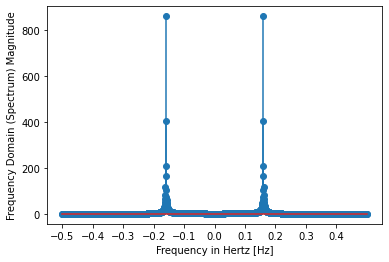

In [24]:
x1 = dsps_tone_gen_f32(2048, 1.0, 0.16)

X1 = fftpack.fft(x1)
freqs = fftpack.fftfreq(len(x1))# * f_s
print(min(freqs), max(freqs))

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X1))
ax.xaxis.set_ticks(np.arange(-0.5, 0.5, 0.1))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

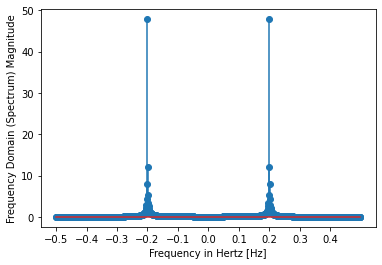

In [25]:
x2 = dsps_tone_gen_f32(1024, 0.1, 0.2)

X2 = fftpack.fft(x2)
freqs = fftpack.fftfreq(len(x2))# * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X2))
ax.xaxis.set_ticks(np.arange(-0.5, 0.5, 0.1))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [7]:
def dsps_cplx2reC_fc32_ansi(data, N):
    if not ((N != 0) and ((N & (N - 1)) == 0)):
        return
    
    n2 = N << 1

    rkl = 0
    rkh = 0
    rnl = 0
    rnh = 0
    ikl = 0
    ikh = 0
    inl = 0
    inh = 0

    for i in range(N // 4):
        rkl = data[i * 2 + 0 + 2];
        ikl = data[i * 2 + 1 + 2];
        rnl = data[n2 - i * 2 - 2];
        inl = data[n2 - i * 2 - 1];

        rkh = data[i * 2 + 0 + 2 + N];
        ikh = data[i * 2 + 1 + 2 + N];
        rnh = data[n2 - i * 2 - 2 - N];
        inh = data[n2 - i * 2 - 1 - N];

        data[i * 2 + 0 + 2] = rkl + rnl;
        data[i * 2 + 1 + 2] = ikl - inl;

        data[n2 - i * 2 - 1 - N] = rkh + rnh;
        data[n2 - i * 2 - 2 - N] = ikh - inh;

        data[i * 2 + 0 + 2 + N] = ikl + inl;
        data[i * 2 + 1 + 2 + N] = rkl - rnl;

        data[n2 - i * 2 - 1] = ikh + inh;
        data[n2 - i * 2 - 2] = rkh - rnh;
    
    data[N] = data[1]
    data[1] = 0
    data[N + 1] = 0

In [15]:
N = 64
data = [i for i in range(2 * N)]
print(data,"\n")
dsps_cplx2reC_fc32_ansi(data, N)
print(data[:N], "\n")
print(data[N + 1:], "\n")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127] 

[0, 0, 128, -124, 128, -120, 128, -116, 128, -112, 128, -108, 128, -104, 128, -100, 128, -96, 128, -92, 128, -88, 128, -84, 128, -80, 128, -76, 128, -72, 128, -68, 64, 128, 60, 128, 56, 128, 52, 128, 48, 128, 44, 128, 40, 128, 36, 128, 32, 128, 28, 128, 24, 128, 20, 128, 16, 128, 12, 128, 8, 128, 4, 128] 

[0, 130, -124, 130, -120, 130, -116, 130, -112, 130, -108, 130, -104, 130, -100, 130, -96, 130, -92, 130, -88, 130, -84, 130, -80, 130, -76, 130, -72, 130, -68

In [38]:
import math
def rms_pp(rms):
    return (rms*math.sqrt(2)) * 2
def pp_rms(pp):
    return (pp / 2) / math.sqrt(2)

In [40]:
adc_max = 2.45
adc_min = 0.15
print("ADC excursion:", adc_max - adc_min)
P = 1200 # Watts
Vrms = 220
Irms = P / Vrms
print("Irms =", Irms)
Irms_max = 10
print("I / max(I) = {:.2f} %".format(100 * Irms / Irms_max))
pp_P = rms_pp(0.5)
print("Vpp for I({:.2f}) = {:.2f}".format(Irms, pp_P))
print("Vpp / ADC excursion = {:.2f} %".format(100 * pp_P / (adc_max - adc_min)))
print(pp_rms(adc_max - adc_min) * Irms / Irms_max)

ADC excursion: 2.3000000000000003
Irms = 5.454545454545454
I / max(I) = 54.55 %
Vpp for I(5.45) = 1.41
Vpp / ADC excursion = 61.49 %
0.4435487991079253


In [42]:
vdc = 1027 / 1000 # V
vrms = 1.5

vrms2 = 2

vdiff = vrms2 - vrms

vpp = 2 * math.sqrt(2) * vdiff

print(vpp)

1.4142135623730951


In [43]:
r1 = 3.48 * 1000 # ohm
r2 = 544 # ohm

r1 / r2

6.397058823529412